In [90]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

import tensorflow as tf
import os
from tensorflow.keras import layers, models
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split

In [91]:
# encoding = 'CP949'
filename = 'gasoline_price.csv'
data = pd.read_csv(filename)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5696 entries, 0 to 5695
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      5696 non-null   object 
 1   서울      5696 non-null   float64
 2   부산      5696 non-null   float64
 3   대구      5696 non-null   float64
 4   인천      5696 non-null   float64
 5   광주      5696 non-null   float64
 6   대전      5696 non-null   float64
 7   울산      5696 non-null   float64
 8   경기      5696 non-null   float64
 9   강원      5696 non-null   float64
 10  충북      5696 non-null   float64
 11  충남      5696 non-null   float64
 12  전북      5696 non-null   float64
 13  전남      5696 non-null   float64
 14  경북      5696 non-null   float64
 15  경남      5696 non-null   float64
 16  제주      5696 non-null   float64
 17  세종      4020 non-null   float64
dtypes: float64(17), object(1)
memory usage: 801.1+ KB


In [92]:
data.head(10)

,구분,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,세종
0,2008년04월15일,1734.58,1670.48,1685.09,1681.13,1681.41,1678.26,1679.84,1685.70,1667.75,1666.60,1670.94,1663.01,1677.56,1676.57,1674.62,1692.05,NaN
1,2008년04월16일,1749.97,1677.34,1690.47,1694.46,1690.59,1689.88,1684.25,1699.21,1675.11,1670.79,1678.60,1667.78,1681.05,1683.83,1680.75,1696.70,NaN
2,2008년04월17일,1744.71,1675.69,1686.59,1689.71,1690.14,1682.45,1683.56,1691.94,1676.31,1671.39,1675.84,1665.62,1685.62,1679.24,1679.82,1692.67,NaN
3,2008년04월18일,1748.01,1680.20,1687.34,1692.96,1690.78,1687.67,1686.83,1695.64,1677.78,1675.73,1677.15,1668.06,1695.48,1680.12,1681.93,1693.66,NaN
4,2008년04월19일,1748.87,1686.53,1690.91,1693.92,1700.98,1688.19,1691.03,1698.18,1681.05,1679.59,1682.04,1669.12,1702.76,1684.74,1685.71,1693.28,NaN
5,2008년04월20일,1747.04,1688.31,1691.37,1695.11,1704.12,1692.37,1693.93,1698.73,1681.36,1682.04,1684.19,1670.19,1704.24,1684.95,1687.88,1695.90,NaN
6,2008년04월21일,1748.01,1688.67,1693.26,1696.89,1707.59,1693.10,1694.73,1698.97,1684.36,1683.70,1685.33,1671.87,1705.49,1688.08,1689.50,1706.10,NaN
7,2008년04월22일,1752.54,1689.69,1695.17,1698.62,1709.58,1694.60,1695.15,1700.32,1686.24,1685.38,1687.80,1683.68,1705.23,1690.68,1691.73,1707.88,NaN
8,2008년04월23일,1759.26,1694.91,1701.49,1703.49,1711.50,1700.18,1699.68,1707.06,1690.56,1688.97,1691.61,1697.81,1707.03,1692.83,1695.07,1708.17,NaN
9,2008년04월24일,1775.11,1704.62,1710.82,1717.33,1714.60,1707.94,1709.04,1719.77,1700.75,1696.65,1698.12,1711.39,1713.85,1700.39,1702.77,1714.30,NaN


## 2. Data Preparation

In [93]:
char_replace = ['년', '월']

for char in char_replace:
    data['구분'] = data['구분'].str.replace(char, '-')

data['구분'] = data['구분'].str.replace('일', '')
#data['구분'] = data['구분'].str[:-1]

data.rename({'구분':'Day'}, axis=1, inplace = True)

data['Day'] = pd.to_datetime(data['Day'], format = "%Y-%m-%d")

In [94]:
data.head(3)

,Day,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,세종
0,2008-04-15,1734.58,1670.48,1685.09,1681.13,1681.41,1678.26,1679.84,1685.70,1667.75,1666.60,1670.94,1663.01,1677.56,1676.57,1674.62,1692.05,NaN
1,2008-04-16,1749.97,1677.34,1690.47,1694.46,1690.59,1689.88,1684.25,1699.21,1675.11,1670.79,1678.60,1667.78,1681.05,1683.83,1680.75,1696.70,NaN
2,2008-04-17,1744.71,1675.69,1686.59,1689.71,1690.14,1682.45,1683.56,1691.94,1676.31,1671.39,1675.84,1665.62,1685.62,1679.24,1679.82,1692.67,NaN


In [95]:
data.tail(3)

,Day,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,세종
5693,2023-11-16,1760.22,1653.70,1622.90,1644.62,1645.63,1648.59,1640.74,1675.14,1711.81,1695.03,1693.82,1661.24,1695.77,1660.11,1662.35,1682.66,1669.43
5694,2023-11-17,1757.69,1650.62,1618.01,1640.83,1640.14,1644.99,1636.45,1671.15,1707.76,1691.66,1688.60,1657.76,1691.56,1655.34,1659.03,1681.98,1667.40
5695,2023-11-18,1752.40,1649.19,1614.60,1639.23,1635.94,1642.17,1633.39,1667.89,1703.30,1687.91,1684.52,1654.65,1688.31,1651.02,1655.74,1682.26,1663.82


Data is from 2008 April 15 to 2023 Nov 18 with 5696 records.

## 3. EDA

### 1. Missin Values

In [187]:
print(data.isnull().sum())

Day    0
서울     0
부산     0
대구     0
인천     0
광주     0
대전     0
울산     0
경기     0
강원     0
충북     0
충남     0
전북     0
전남     0
경북     0
경남     0
제주     0
세종     0
dtype: int64


In [188]:
data['세종'] = data['세종'].fillna(0)
print(data.isnull().sum())

Day    0
서울     0
부산     0
대구     0
인천     0
광주     0
대전     0
울산     0
경기     0
강원     0
충북     0
충남     0
전북     0
전남     0
경북     0
경남     0
제주     0
세종     0
dtype: int64


### 2. Line Chart

In [98]:
fig = px.line(data, x='Day', y='서울', title = 'Gasoline Prices of Seoul by Year',
              labels = {
                  "Day" : "Year",
                  "서울" : "Gasoline Price (won)"
              },
              template = 'plotly_dark')
fig.show()

### 3. Histogram

In [99]:
fig = px.histogram(data, x='서울', 
                   title = 'Gasoline Prices of Seoul',
                   labels = {
                  "서울" : "Gasoline Price (won)"
                   },
                   template = 'plotly_dark')
fig.show()

### 4. Check if a Time Series is Stationary or Not

In [100]:
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    rolmean = timeseries.rolling(25).mean()
    rolstd = timeseries.rolling(25).std()

    # Plot rolling statistics:
    plt.figure(figsize = (20,10))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    print(dfoutput)

In [101]:
new_data= data.set_index("Day")
seoul = new_data['서울']

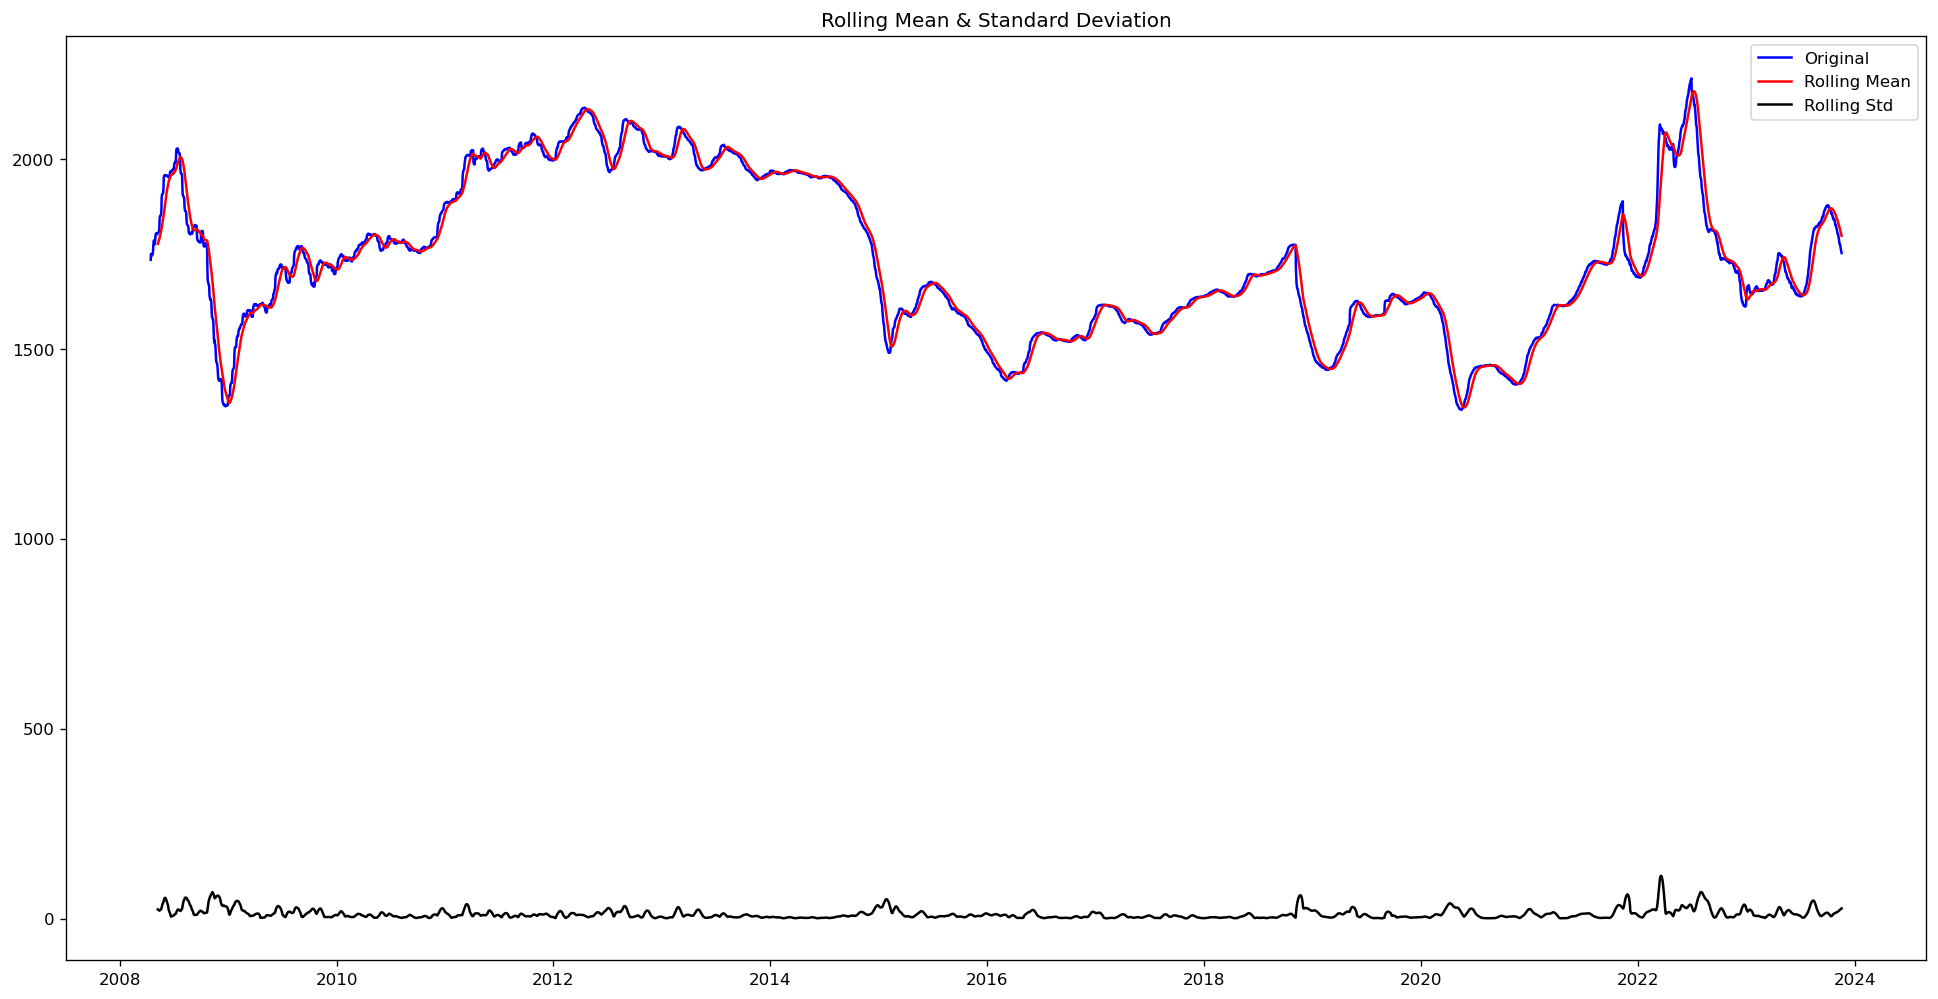

Results of Dickey-Fuller Test:
Test Statistic                   -2.807326
p-value                           0.057235
#Lags Used                       22.000000
Number of Observations Used    5673.000000
Critical Value (1%)              -3.431503
Critical Value (5%)              -2.862050
Critical Value (10%)             -2.567041
dtype: float64


In [102]:
test_stationarity(seoul)

---
Test Statistics shows how closely your observed data match the distribution expected under the null hypothesis of that statistical test.

Test Statistic < Critical Value & p-value < 0.05. Hence we reject the Null Hypothesis.

Data is Stationary.

However, There are 2 major reasons behind non-stationaruty of a TS:
1. Trend – Varying mean over time.
2. Seasonality – Variations at specific time-frames.

If TS is non-stationary: Estimate the trend and seasonality in the ts and remove it.

Final step: To convert the forecasted values into the original scale by applying trend and seasonality constraints back.

More less test statistic value more trend in pattern.

---

### 5. Estimating and Eliminating Trends

---
Simple Trend Reduction Techniques: Moving Average and Exponential Weighted Moving Average.

The simple trend reduction techniques don’t work with high seasonality. There we use following methods.

1. Differencing – Taking the difference with a particular Time Lag. Subtracting Current observation from previous.

2. Decomposition – Modeling both trend and seasonality and removing them from the model. Residuals of LR. Additive Dec.

---

#### Exponential Weighted Moving Average

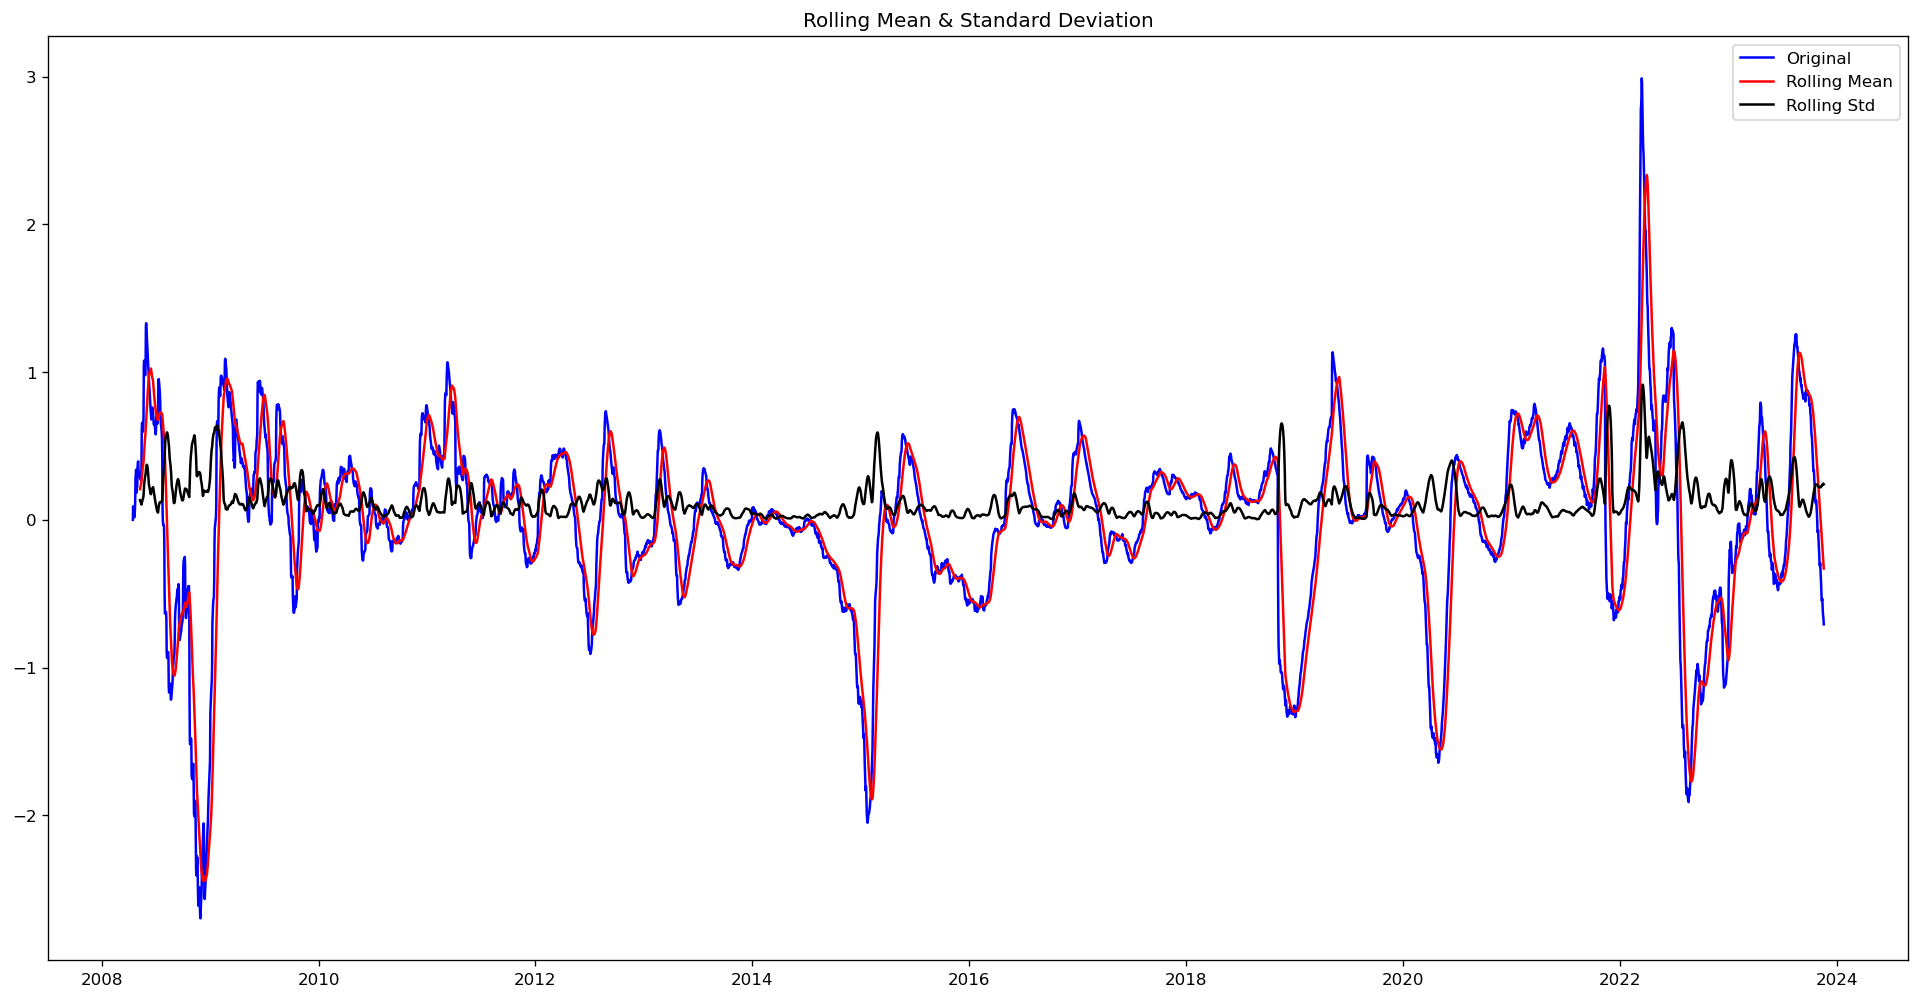

Results of Dickey-Fuller Test:
Test Statistic                -7.885711e+00
p-value                        4.575849e-12
#Lags Used                     2.200000e+01
Number of Observations Used    5.673000e+03
Critical Value (1%)           -3.431503e+00
Critical Value (5%)           -2.862050e+00
Critical Value (10%)          -2.567041e+00
dtype: float64


In [103]:
ts_sqrt = np.sqrt(seoul)
expwighted_avg = ts_sqrt.ewm(halflife = 25).mean()

ts_sqrt_ewma_diff = ts_sqrt - expwighted_avg
test_stationarity(ts_sqrt_ewma_diff)

#### Differencing

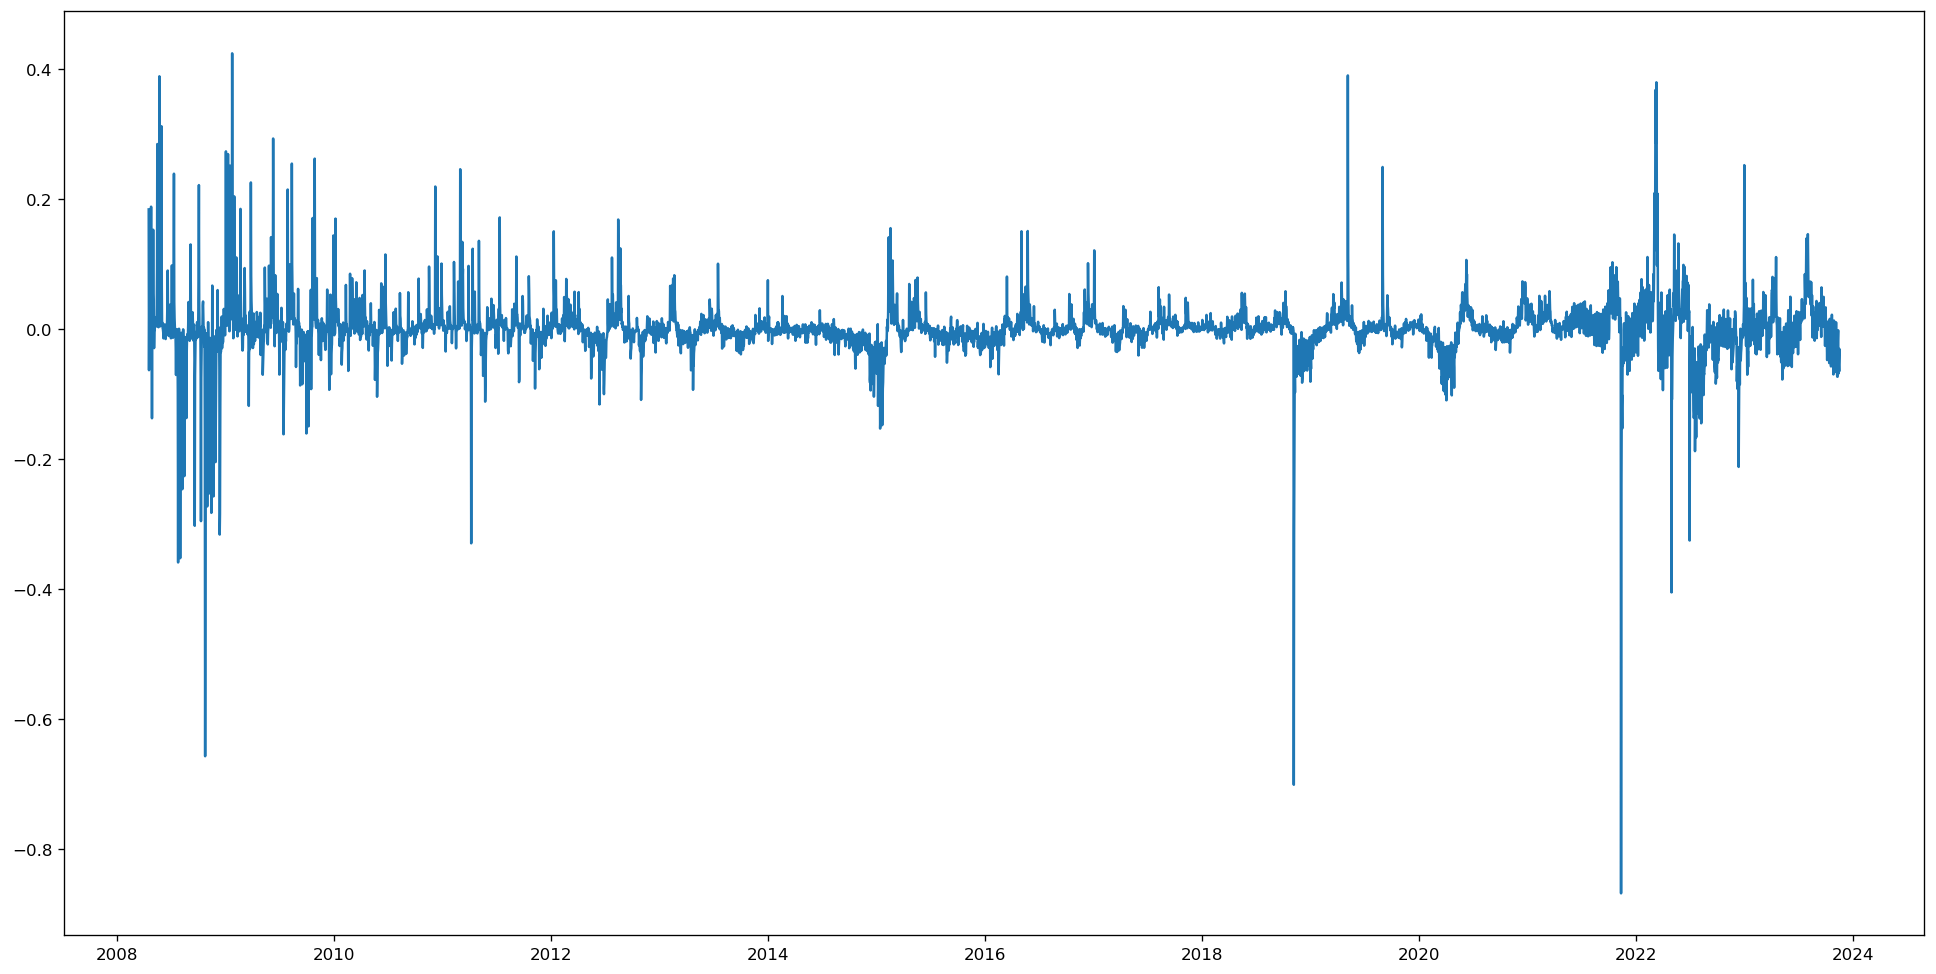

In [104]:
ts_sqrt_diff = ts_sqrt - ts_sqrt.shift()

plt.figure(figsize = (20,10))
plt.plot(ts_sqrt_diff)
plt.show()

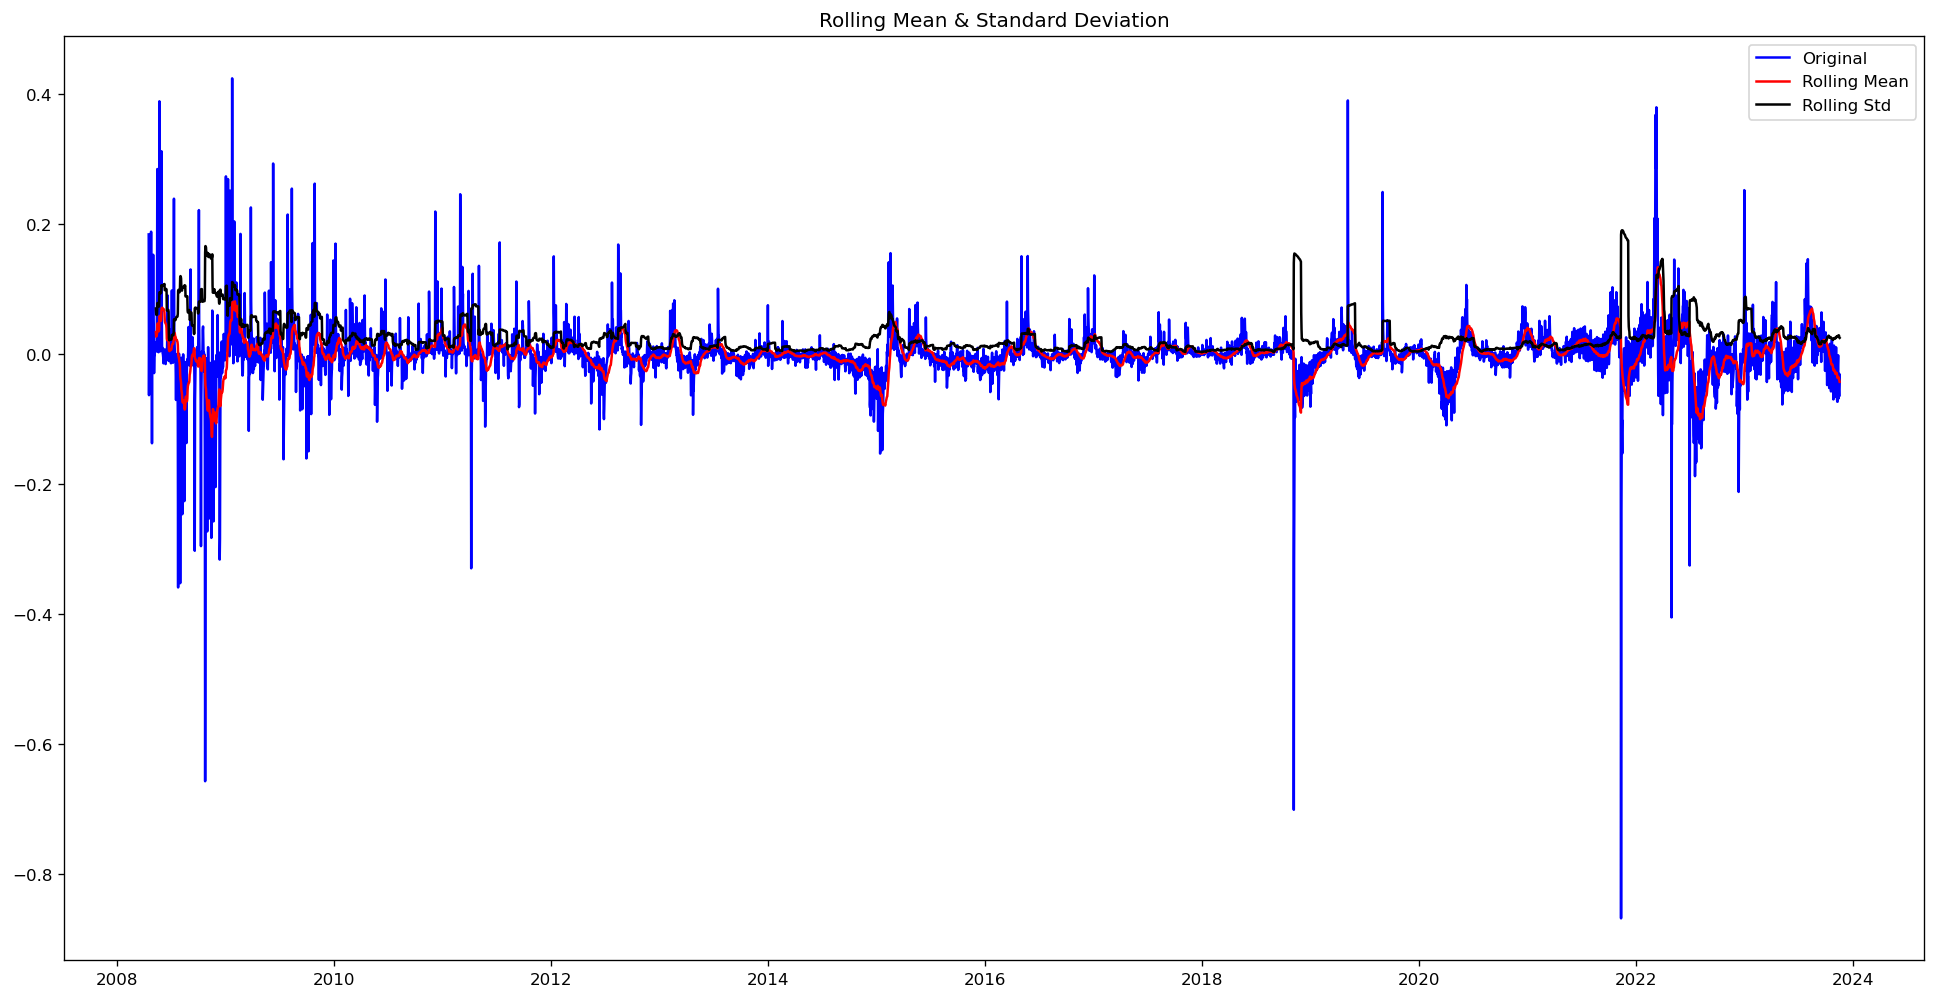

Results of Dickey-Fuller Test:
Test Statistic                -1.073428e+01
p-value                        2.926024e-19
#Lags Used                     2.100000e+01
Number of Observations Used    5.673000e+03
Critical Value (1%)           -3.431503e+00
Critical Value (5%)           -2.862050e+00
Critical Value (10%)          -2.567041e+00
dtype: float64


In [105]:
ts_sqrt = np.sqrt(seoul)
ts_sqrt_diff = ts_sqrt - ts_sqrt.shift()
ts_sqrt_diff.dropna(inplace = True)
test_stationarity(ts_sqrt_diff)

Test Statistic < Critical Value and also there is less diversion in mean and std. This is perfect stationary ts.

## 4. Data Modeling

Train Test Split

https://www.kaggle.com/code/mykeysid10/natural-gas-price-prediction-using-time-series/notebook#Data-Modeling

In [106]:
seoul.head(10)

Day
2008-04-15    1734.58
2008-04-16    1749.97
2008-04-17    1744.71
2008-04-18    1748.01
2008-04-19    1748.87
2008-04-20    1747.04
2008-04-21    1748.01
2008-04-22    1752.54
2008-04-23    1759.26
2008-04-24    1775.11
Name: 서울, dtype: float64

In [107]:
seoul = seoul.to_frame()

In [108]:
seoul.head(3)

,서울
Day,
2008-04-15,1734.58
2008-04-16,1749.97
2008-04-17,1744.71



train, test = train_test_split(seoul, test_size=0.2)

##### 5696
msk = np.random.rand(len(seoul)) < 0.8
train = seoul[msk]
test = seoul[~msk]

### .8 split

In [109]:
train, test= np.split(seoul, [int(.8 *len(data))])

print("Length of Train Data: ", len(train))
print("Length of Test Data: ", len(test))

Length of Train Data:  4556
Length of Test Data:  1140


In [110]:
train.head(3)

,서울
Day,
2008-04-15,1734.58
2008-04-16,1749.97
2008-04-17,1744.71


In [111]:
train.tail(3)

,서울
Day,
2020-10-02,1434.60
2020-10-03,1433.50
2020-10-04,1433.39


In [112]:
test.head(3)

,서울
Day,
2020-10-05,1433.61
2020-10-06,1432.24
2020-10-07,1431.37


In [113]:
test.tail(3)

,서울
Day,
2023-11-16,1760.22
2023-11-17,1757.69
2023-11-18,1752.40


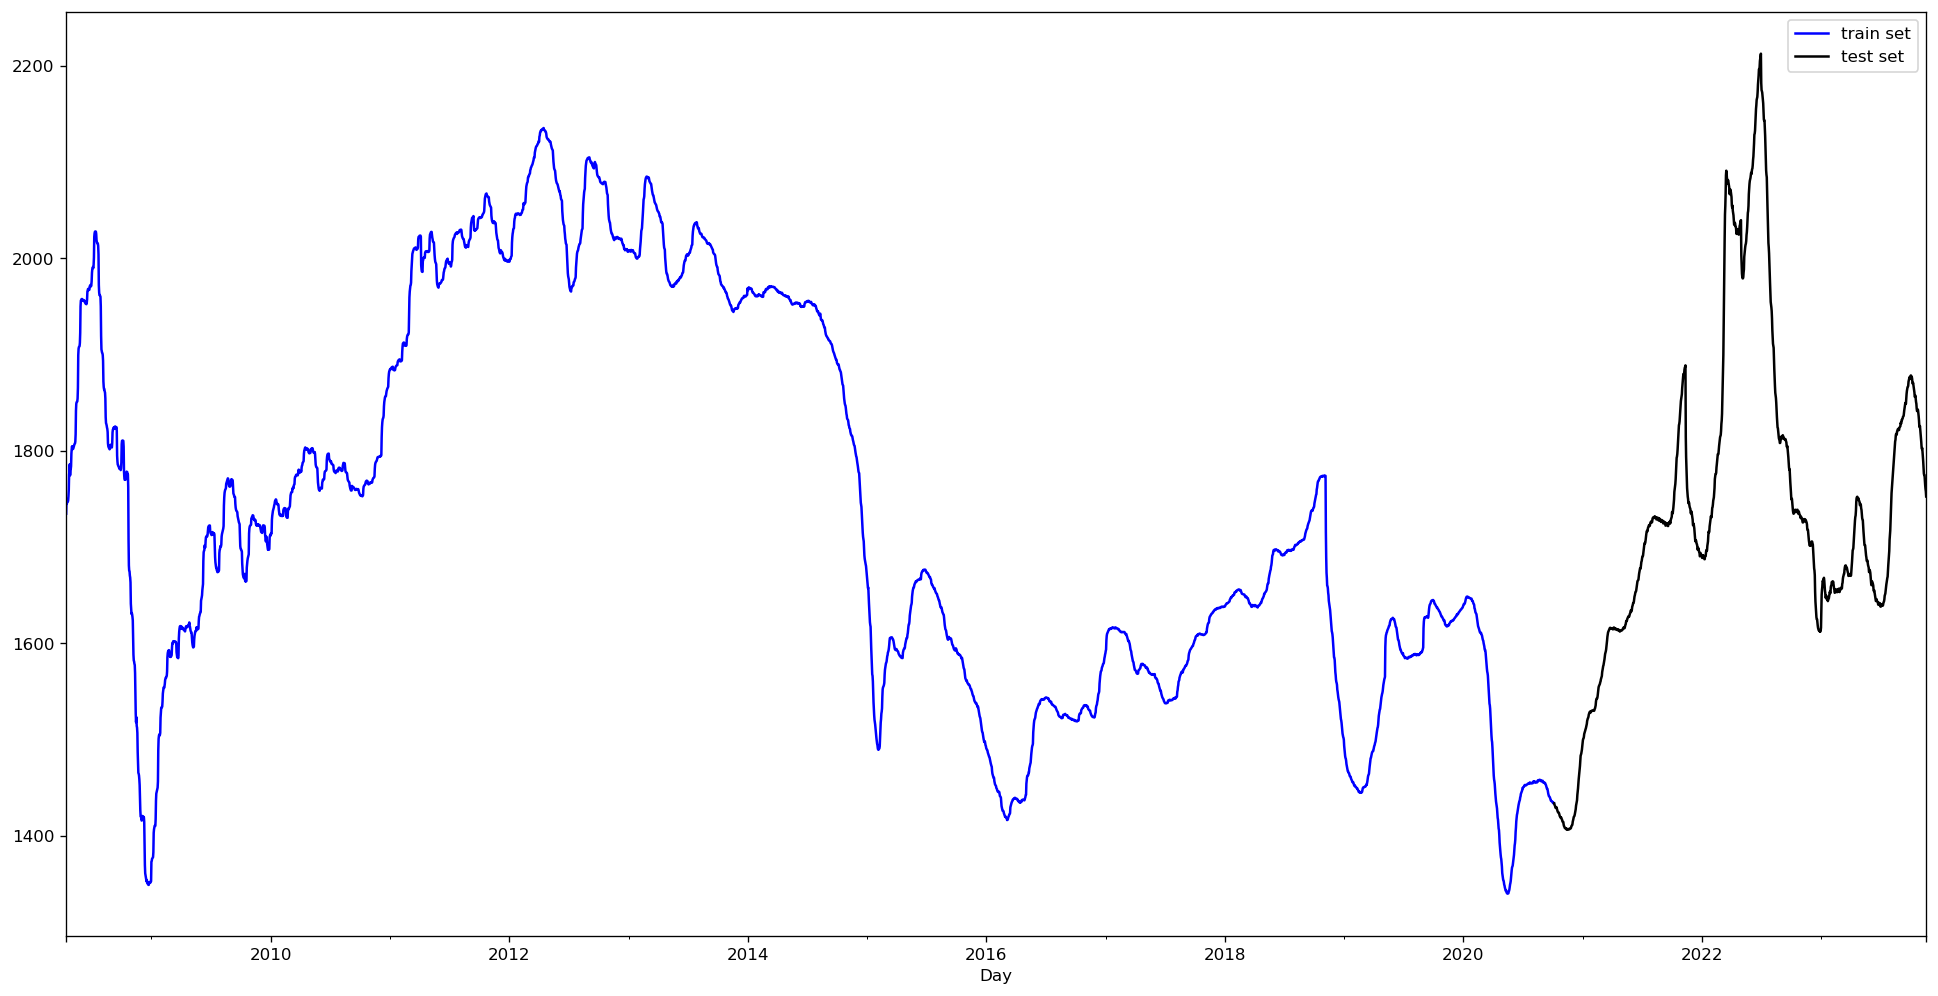

In [114]:
ax = train.plot(figsize = (20, 10), color = 'b')
test.plot(ax = ax, color = 'black')
plt.legend(['train set', 'test set'])
plt.show()

#### Arima: Auto Regressive Integrated Moving Average

is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

>

Prerequisite: Data must be stationary.

An ARIMA model is characterized by 3 terms: p: order of the AR term , q: MA term, d is the number of differencing required to make the time series stationary.

##### Finding d: Number of differences required.

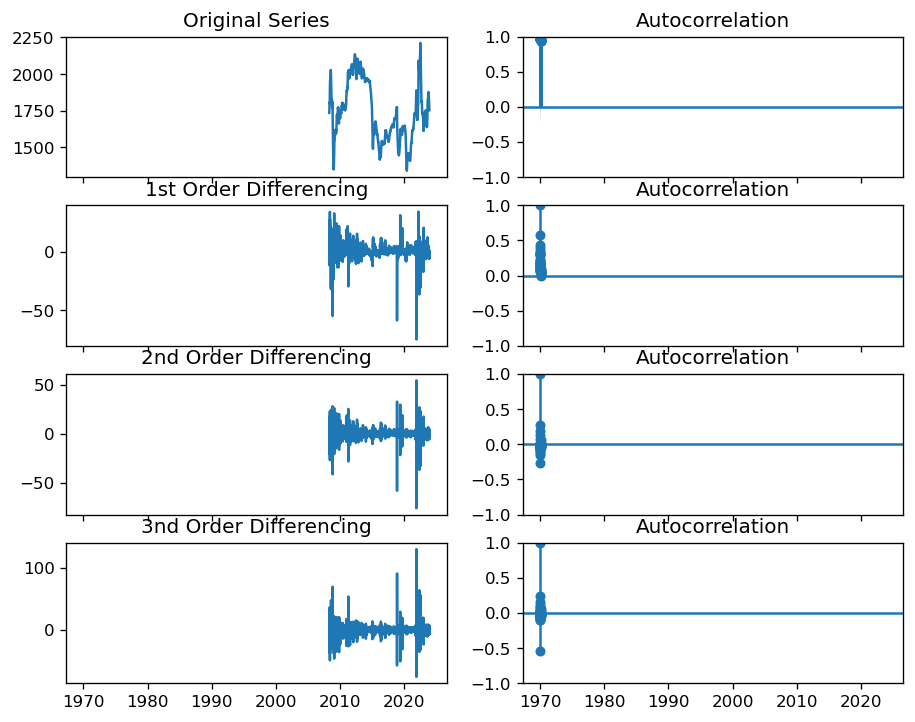

In [115]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(seoul.서울); axes[0, 0].set_title('Original Series')
plot_acf(seoul.서울, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(seoul.서울.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(seoul.서울.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(seoul.서울.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(seoul.서울.diff().diff().dropna(), ax=axes[2, 1])

# 3rd Differencing
axes[3, 0].plot(seoul.서울.diff().diff().diff()); axes[3, 0].set_title('3nd Order Differencing')
plot_acf(seoul.서울.diff().diff().diff().dropna(), ax=axes[3, 1])

plt.show()

##### Finding order of AR term (p)

We will find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

Partial autocorrelation can be imagined as the correlation between the series and its lag.

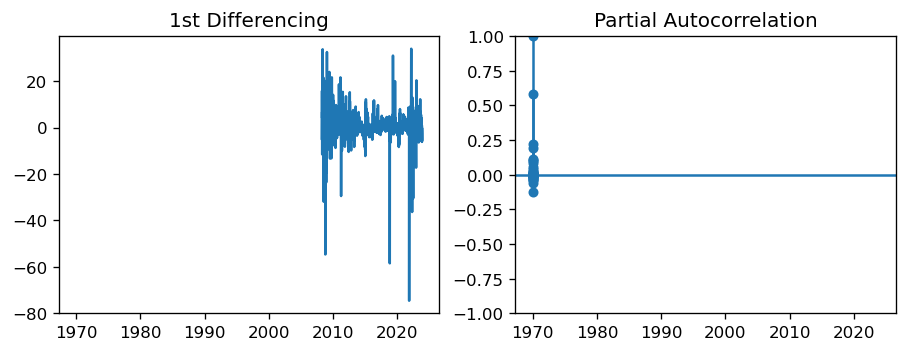

In [116]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(seoul.서울.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(seoul.서울.diff().dropna(), ax=axes[1])

plt.show()

##### Finding order of MA term (q)

An MA term is technically, the error of the lagged forecast.

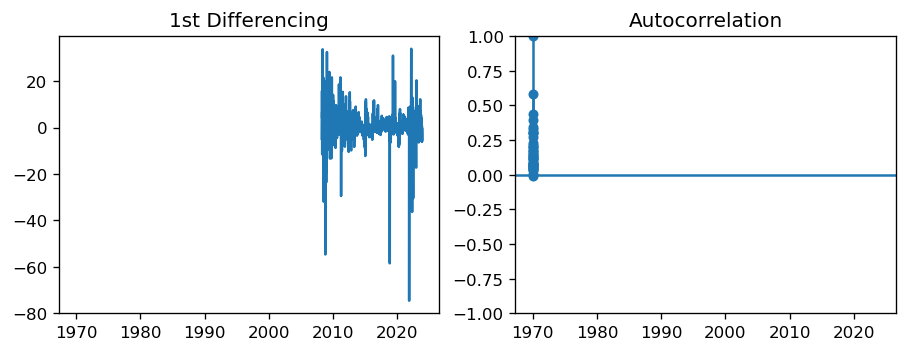

In [117]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)

axes[0].plot(seoul.서울.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(seoul.서울.diff().dropna(), ax=axes[1])

plt.show()

In [118]:
model = sm.tsa.arima.ARIMA(train, order = (1, 2, 1))
arima_model = model.fit() 
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                     서울   No. Observations:                 4556
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -11105.317
Date:                Mon, 27 Nov 2023   AIC                          22216.635
Time:                        21:40:46   BIC                          22235.906
Sample:                    04-15-2008   HQIC                         22223.421
                         - 10-04-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3954      0.009     45.002      0.000       0.378       0.413
ma.L1         -0.9226      0.005   -204.188      0.000      -0.931      -0.914
sigma2         7.6831      0.026    295.266      0.0

In [119]:
yp_train = arima_model.predict(start = 0, end = (len(train)-1))
yp_test = arima_model.predict(start = 0, end = (len(test)-1)) 

print("Train Data:\nMean Square Error: {}".format(mean_squared_error(train, 
                                                                     yp_train)))
print("\nTest Data:\nMean Square Error: {}".format(mean_squared_error(test, 
                                                                      yp_test)))

Train Data:
Mean Square Error: 827.3974709870456

Test Data:
Mean Square Error: 60488.2633690633


In [120]:
print(yp_test)

2008-04-15       0.000000
2008-04-16    2601.871784
2008-04-17    1765.365178
2008-04-18    1745.619337
2008-04-19    1752.873117
                 ...     
2011-05-25    1978.346194
2011-05-26    1972.612215
2011-05-27    1970.092257
2011-05-28    1969.545977
2011-05-29    1968.703837
Freq: D, Name: predicted_mean, Length: 1140, dtype: float64


In [121]:
print(test)

                 서울
Day                
2020-10-05  1433.61
2020-10-06  1432.24
2020-10-07  1431.37
2020-10-08  1430.60
2020-10-09  1429.07
...             ...
2023-11-14  1768.84
2023-11-15  1764.10
2023-11-16  1760.22
2023-11-17  1757.69
2023-11-18  1752.40

[1140 rows x 1 columns]


In [122]:
print(yp_train)

2008-04-15       0.000000
2008-04-16    2601.871784
2008-04-17    1765.365178
2008-04-18    1745.619337
2008-04-19    1752.873117
                 ...     
2020-09-30    1434.706491
2020-10-01    1433.996223
2020-10-02    1434.781129
2020-10-03    1434.120342
2020-10-04    1432.683717
Freq: D, Name: predicted_mean, Length: 4556, dtype: float64


In [123]:
print(train)

                 서울
Day                
2008-04-15  1734.58
2008-04-16  1749.97
2008-04-17  1744.71
2008-04-18  1748.01
2008-04-19  1748.87
...             ...
2020-09-30  1434.64
2020-10-01  1434.97
2020-10-02  1434.60
2020-10-03  1433.50
2020-10-04  1433.39

[4556 rows x 1 columns]


#### LSTM: Long Short Term Memory Model

In [124]:
slot = 15

x_train = []
y_train = []

for i in range(slot, len(train)):
    x_train.append(train.iloc[i-slot:i, 0])
    y_train.append(train.iloc[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape, y_train.shape)

(4541, 15, 1) (4541,)


In [125]:
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(units = 50, input_shape = (slot, 1), 
                                    return_sequences = True, 
                                    activation = 'relu'))
#lstm_model.add(tf.keras.layers.Dropout(0.01))
lstm_model.add(tf.keras.layers.LSTM(units = 50, activation = 'relu', 
                                    return_sequences = True))
#lstm_model.add(tf.keras.layers.Dropout(0.01))
lstm_model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
#lstm_model.add(tf.keras.layers.Dropout(0.01))
lstm_model.add(tf.keras.layers.LSTM(units = 50, return_sequences = False))
#lstm_model.add(tf.keras.layers.Dropout(0.01))
lstm_model.add(tf.keras.layers.Dense(units = 1))
lstm_model.compile(loss = 'mean_squared_error', optimizer = 'adam')

lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 15, 50)            10400     
                                                                 
 lstm_9 (LSTM)               (None, 15, 50)            20200     
                                                                 
 lstm_10 (LSTM)              (None, 15, 50)            20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71051 (277.54 KB)
Trainable params: 71051 (277.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [126]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'loss', 
                                                  patience = 7)

history = lstm_model.fit(x_train, y_train, epochs = 100, 
                         batch_size = 64, 
                         verbose = 1, shuffle = False, 
                         callbacks = [early_stopping])

Epoch 1/100
71/71 [==============================] - 5s 21ms/step - loss: 3047448.2500
Epoch 2/100
71/71 [==============================] - 1s 21ms/step - loss: 3020033.0000
Epoch 3/100
71/71 [==============================] - 1s 20ms/step - loss: 3005195.0000
Epoch 4/100
71/71 [==============================] - 1s 20ms/step - loss: 2991643.5000
Epoch 5/100
71/71 [==============================] - 1s 20ms/step - loss: 2978533.7500
Epoch 6/100
71/71 [==============================] - 1s 20ms/step - loss: 2965672.2500
Epoch 7/100
71/71 [==============================] - 1s 20ms/step - loss: 2952980.7500
Epoch 8/100
71/71 [==============================] - 1s 20ms/step - loss: 2940415.2500
Epoch 9/100
71/71 [==============================] - 2s 21ms/step - loss: 2927953.0000
Epoch 10/100
71/71 [==============================] - 2s 21ms/step - loss: 2915576.5000
Epoch 11/100
71/71 [==============================] - 1s 21ms/step - loss: 2903275.7500
Epoch 12/100
71/71 [=====================

### 0.67

In [127]:
seoul['Year'] = pd.to_datetime(seoul.index).year

In [128]:
seoul.head(3)

,서울,Year
Day,,
2008-04-15,1734.58,2008
2008-04-16,1749.97,2008
2008-04-17,1744.71,2008


In [129]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 3)

In [130]:
seoul.set_index('Year', inplace=True)
seoul.sort_index(inplace=True)

In [131]:
seoul.rename(columns={"서울" : "Price"}, inplace=True)

In [132]:
seoul.head(3)

,Price
Year,
2008,1734.58
2008,1749.97
2008,1744.71


In [180]:
X = seoul.drop(labels=['Price'], axis=1)
y = seoul['Price']

In [181]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [182]:
X_train.index

Index([2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008,
       ...
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
      dtype='int32', name='Year', length=4272)

In [183]:
X_test.index

Index([2019, 2019, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020,
       ...
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
      dtype='int32', name='Year', length=1424)

In [184]:
y_train.index

Index([2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008,
       ...
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
      dtype='int32', name='Year', length=4272)

In [185]:
y_test.index

Index([2019, 2019, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020,
       ...
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
      dtype='int32', name='Year', length=1424)

<Axes: xlabel='Year'>

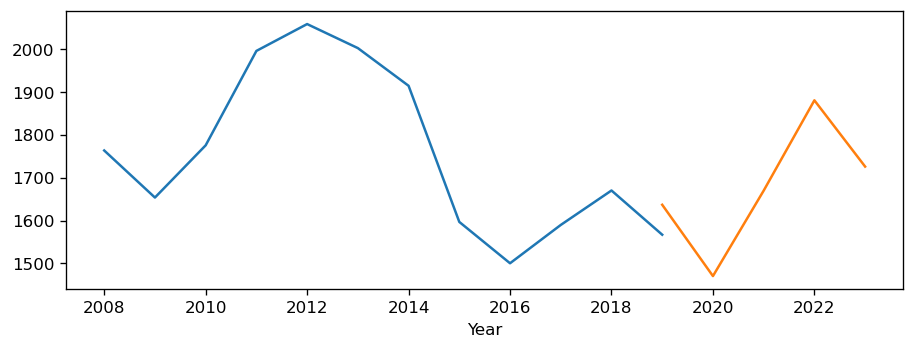

In [186]:
def price2num(x):
    if type(x) == str: 
        x = x.strip('$').replace(',', '')
    return float(x)
#function to convert price from string to floats
y_train=y_train1.apply(price2num)
y_train.groupby('Year').mean().plot()
y_test=y_test1.apply(price2num)
y_test.groupby('Year').mean().plot()

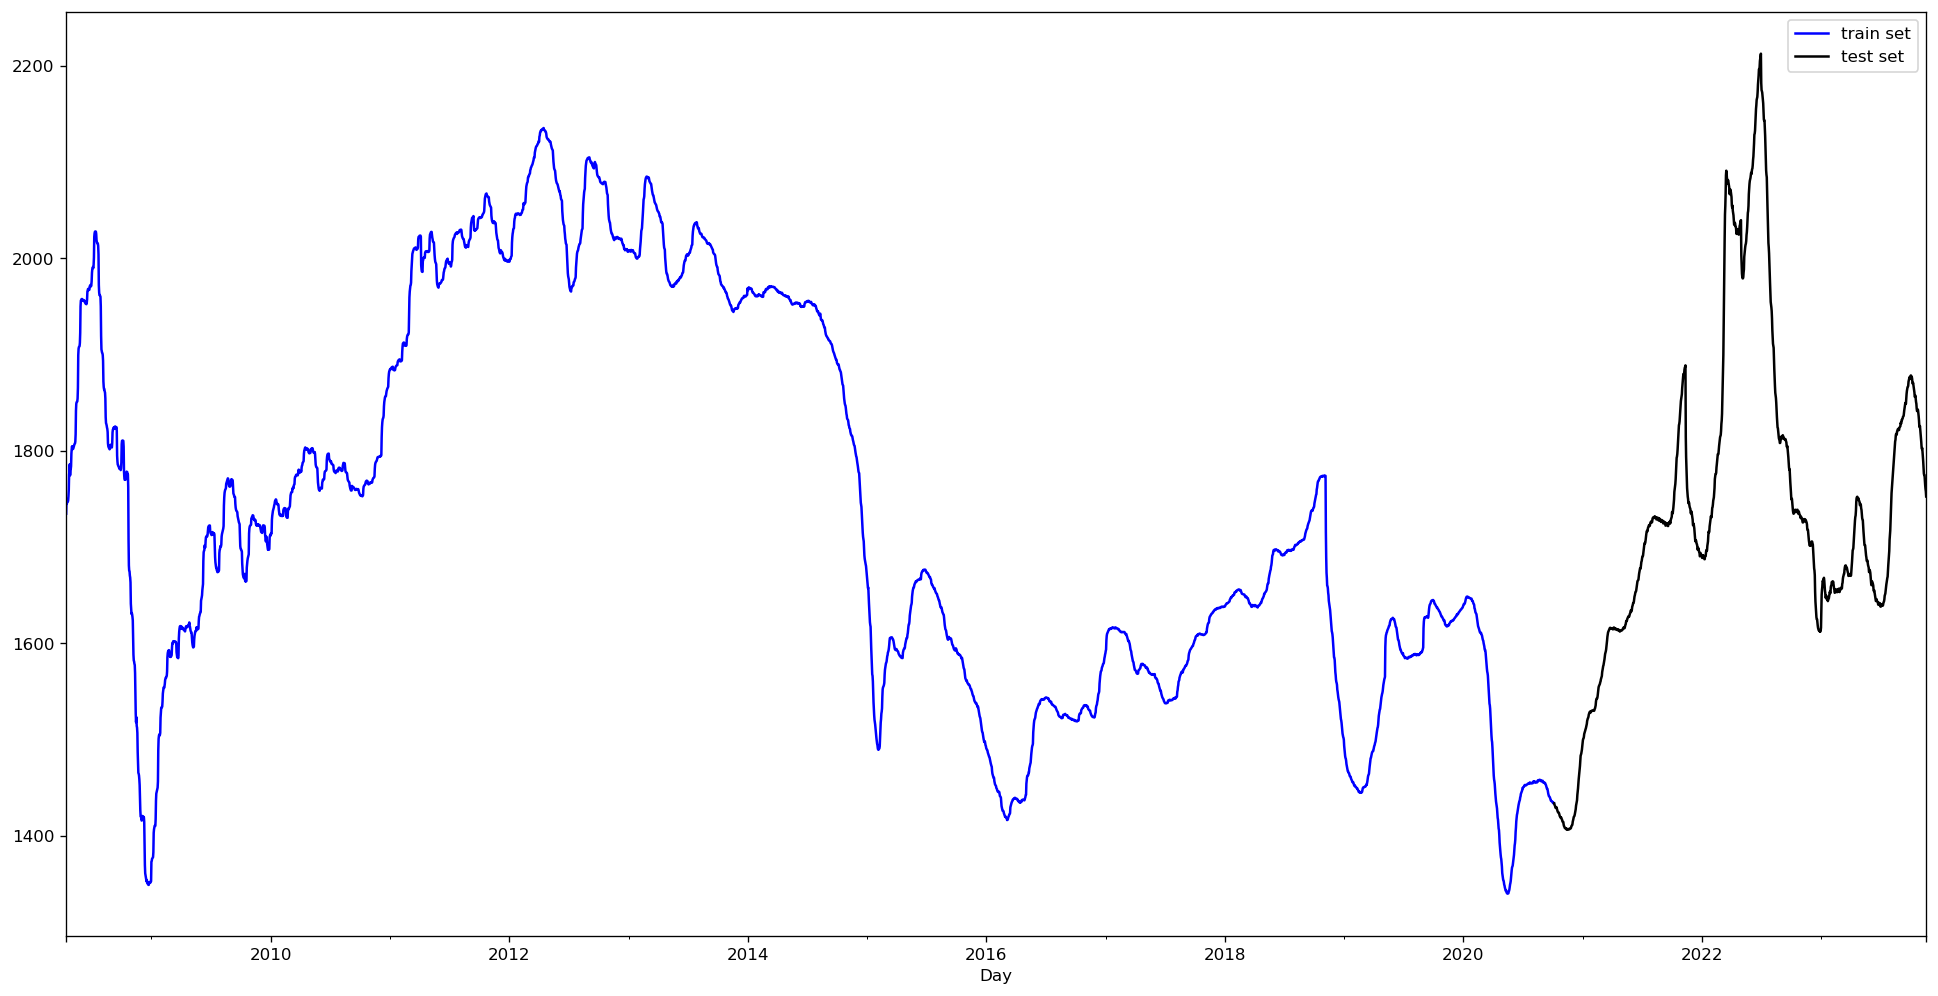

In [176]:
ax = train.plot(figsize = (20, 10), color = 'b')
test.plot(ax = ax, color = 'black')
plt.legend(['train set', 'test set'])
plt.show()

### 5. Model Evaluation

##### Train Data

https://www.kaggle.com/code/mykeysid10/natural-gas-price-prediction-using-time-series?scriptVersionId=101705463&cellId=59

In [478]:
yp_train = lstm_model.predict(x_train)
a = pd.DataFrame(yp_train)
a.rename(columns = {0: 'gp_pred'}, inplace = True); 
a.index = train.iloc[slot:].index
train_compare = pd.concat([train.iloc[slot:], a], 1)

142/142 [==============================] - 1s 5ms/step


TypeError: concat() takes 1 positional argument but 2 were given